In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"C:\Users\User\Documents\eeeeeeeeeeeeeee.csv")


In [5]:
df.head()

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941


In [9]:
df.shape

(10000, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Farm_ID               10000 non-null  int64  
 1   Soil_pH               10000 non-null  float64
 2   Soil_Moisture         10000 non-null  float64
 3   Temperature_C         10000 non-null  float64
 4   Rainfall_mm           10000 non-null  float64
 5   Crop_Type             10000 non-null  object 
 6   Fertilizer_Usage_kg   10000 non-null  float64
 7   Pesticide_Usage_kg    10000 non-null  float64
 8   Crop_Yield_ton        10000 non-null  float64
 9   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


In [13]:
df.isnull().sum()

Farm_ID                 0
Soil_pH                 0
Soil_Moisture           0
Temperature_C           0
Rainfall_mm             0
Crop_Type               0
Fertilizer_Usage_kg     0
Pesticide_Usage_kg      0
Crop_Yield_ton          0
Sustainability_Score    0
dtype: int64

In [15]:
df.duplicated().sum()

0

Exploratory Data Analysis (EDA)

In [18]:
#descriptive stataistics
df.describe()

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,6.499494,29.988655,25.027475,174.969854,125.212701,10.521074,5.489634,50.213200
std,2886.89568,0.574181,11.493376,5.769509,72.860989,43.132645,5.535558,2.608809,28.667146
min,1.00000,5.500021,10.002907,15.000186,50.031967,50.007543,1.001370,1.000323,0.003672
25%,2500.75000,6.003992,20.027802,20.078612,111.786631,87.945625,5.675684,3.218402,25.974568
50%,5000.50000,6.495380,29.862527,24.955117,174.468002,125.188012,10.619784,5.490626,50.234210
75%,7500.25000,6.993481,40.052369,30.053313,237.812507,162.619398,15.330758,7.740585,74.938267
max,10000.00000,7.499762,49.994713,34.999673,299.986192,199.991631,19.999099,9.999638,99.994545


In [20]:
df.describe(include = "object")

,Crop_Type
count,10000
unique,4
top,Soybean
freq,2559


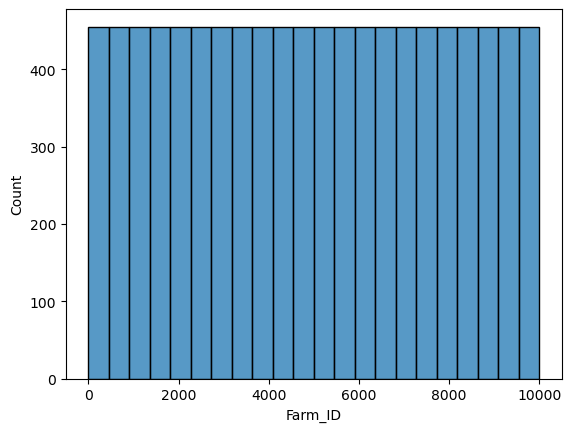

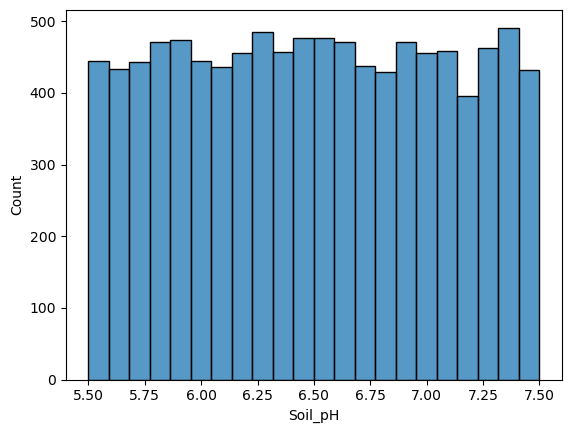

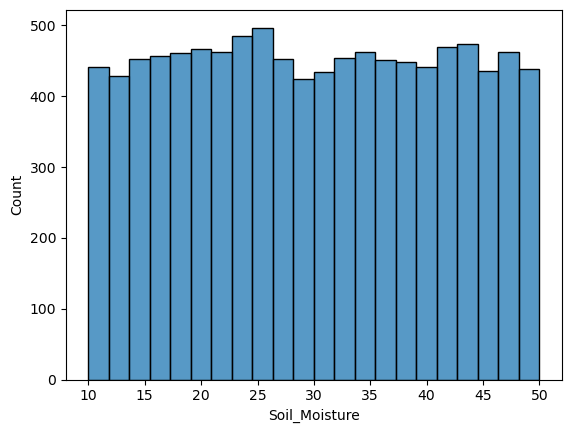

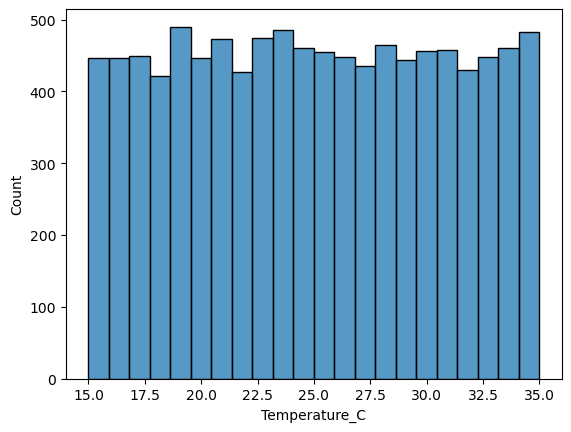

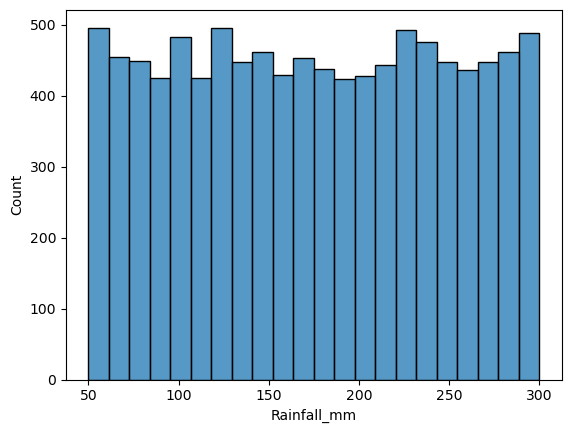

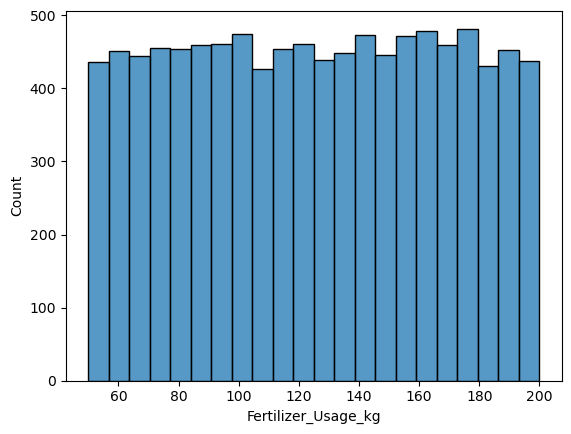

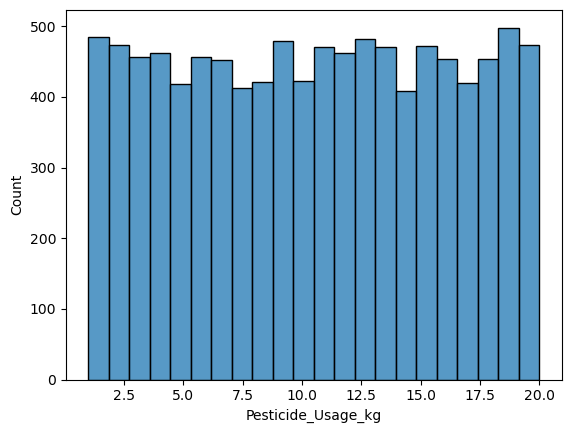

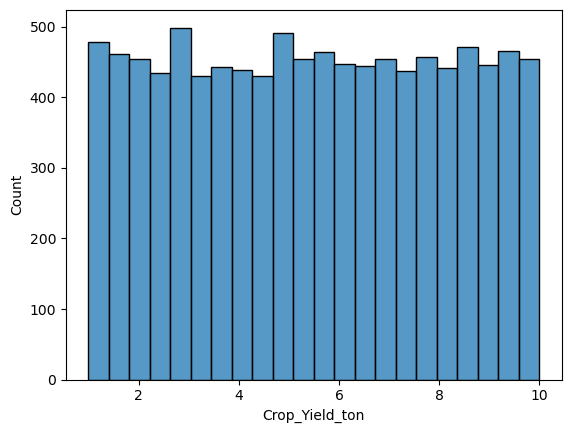

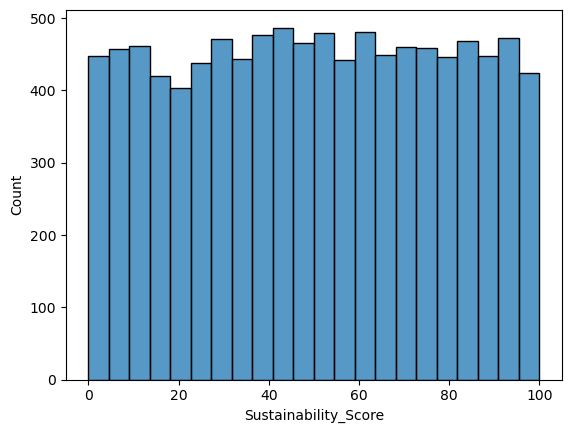

In [22]:
#histogram to understand the distribution
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df, x = i)
    plt.show()

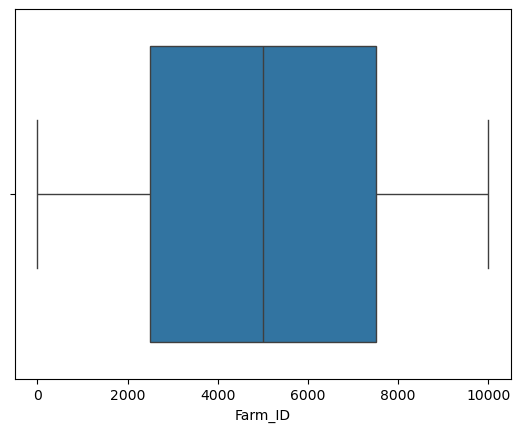

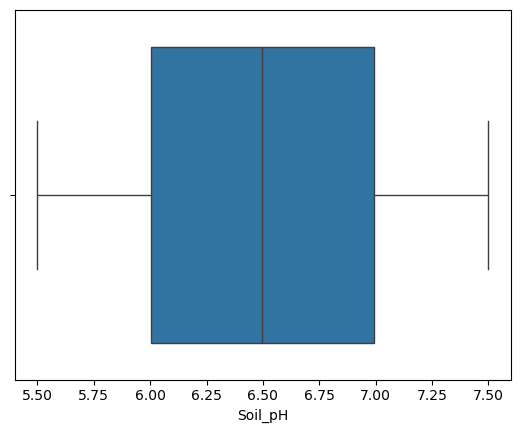

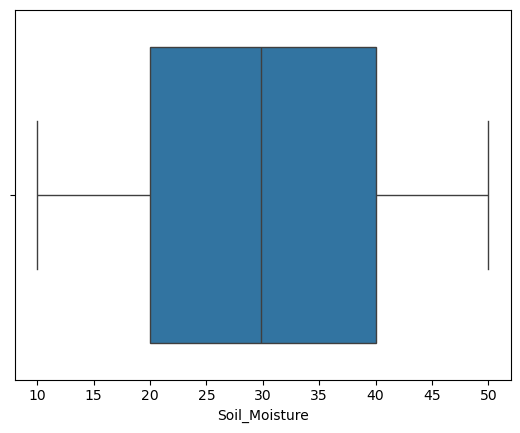

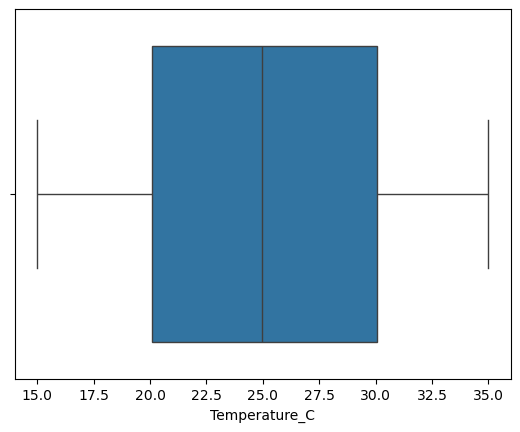

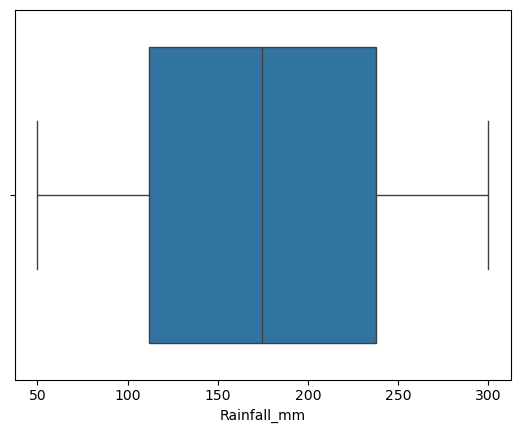

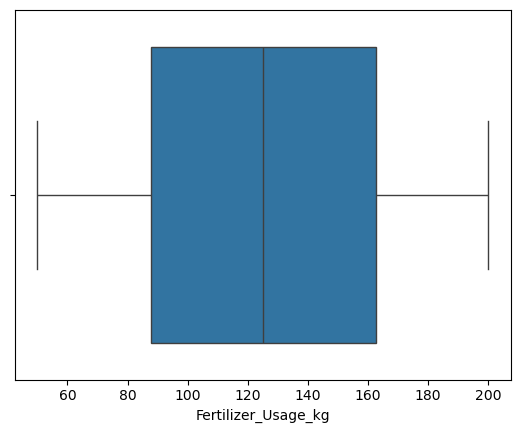

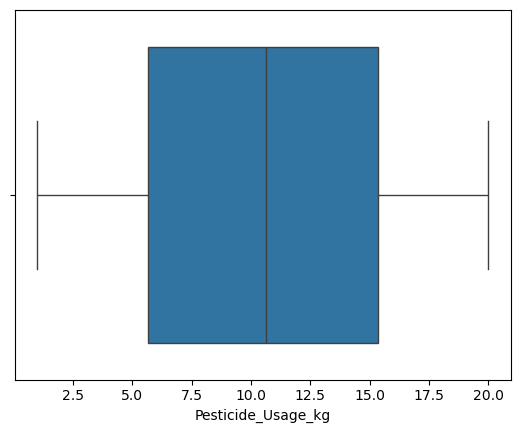

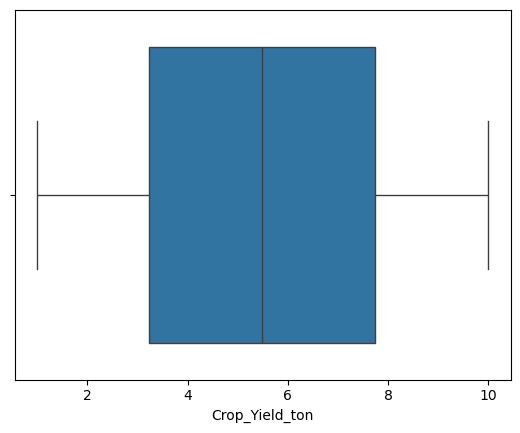

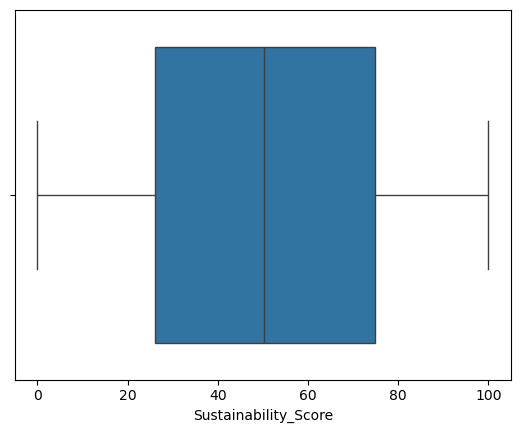

In [23]:
#boxplot to identify the outliers
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data = df, x = i)
    plt.show()

my numerical columns have no outliers

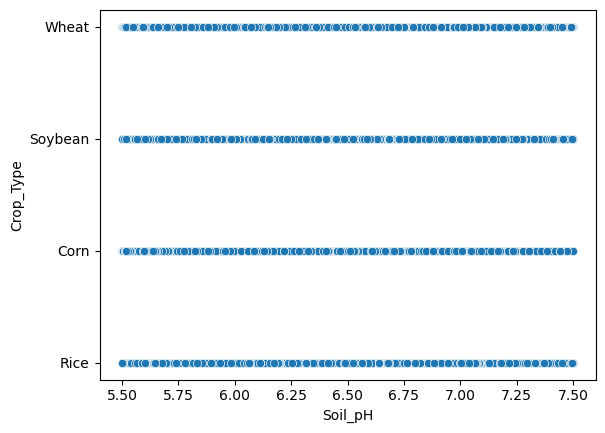

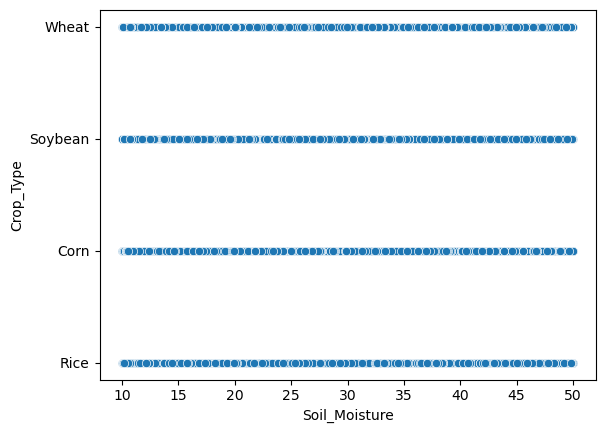

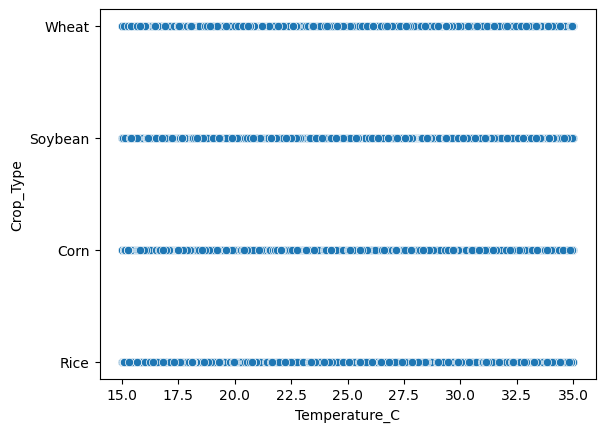

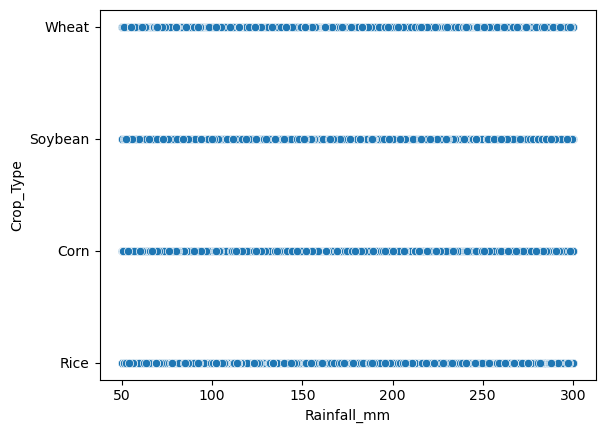

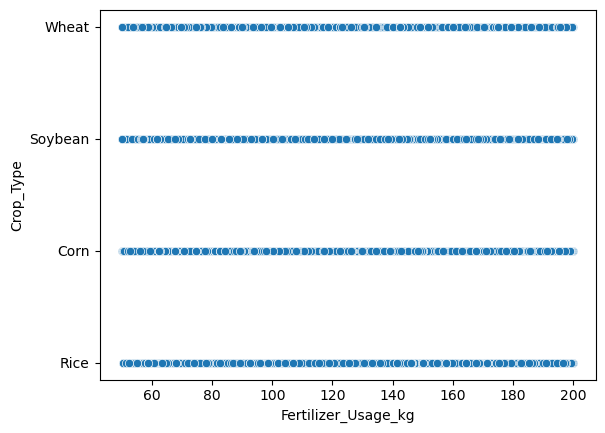

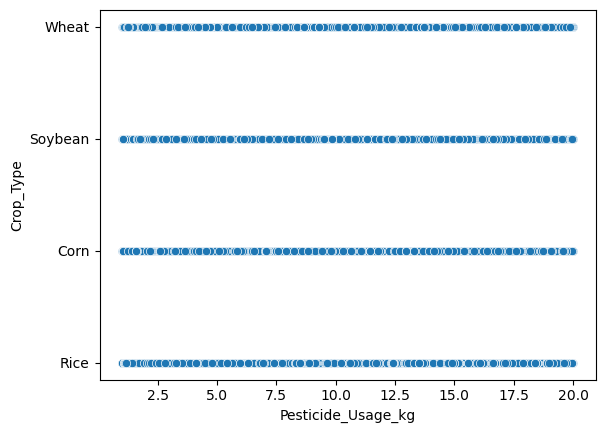

In [25]:
#scatter plot to understand the relationship
for i in['Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm',
       'Fertilizer_Usage_kg', 'Pesticide_Usage_kg']:
       sns.scatterplot(data = df, x = i, y ="Crop_Type")
       plt.show()

In [27]:
#correlation with heatmap to interpret  the relation and multicollinarity
df.select_dtypes(include = "number").corr() 

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
Farm_ID,1.000000,-0.008478,-0.009470,0.006283,0.012606,-0.004358,0.007442,-0.001437,0.009632
Soil_pH,-0.008478,1.000000,-0.011419,0.022694,0.011924,-0.011042,0.013043,0.006391,0.016798
Soil_Moisture,-0.009470,-0.011419,1.000000,-0.014420,0.002495,-0.000599,-0.008233,0.022830,-0.000584
Temperature_C,0.006283,0.022694,-0.014420,1.000000,-0.008471,-0.003177,-0.012004,-0.028832,0.021314
Rainfall_mm,0.012606,0.011924,0.002495,-0.008471,1.000000,-0.004065,-0.027337,-0.003775,0.007135
Fertilizer_Usage_kg,-0.004358,-0.011042,-0.000599,-0.003177,-0.004065,1.000000,0.003329,0.001219,0.010027
Pesticide_Usage_kg,0.007442,0.013043,-0.008233,-0.012004,-0.027337,0.003329,1.000000,0.007202,-0.010203
Crop_Yield_ton,-0.001437,0.006391,0.022830,-0.028832,-0.003775,0.001219,0.007202,1.000000,-0.004034
Sustainability_Score,0.009632,0.016798,-0.000584,0.021314,0.007135,0.010027,-0.010203,-0.004034,1.000000


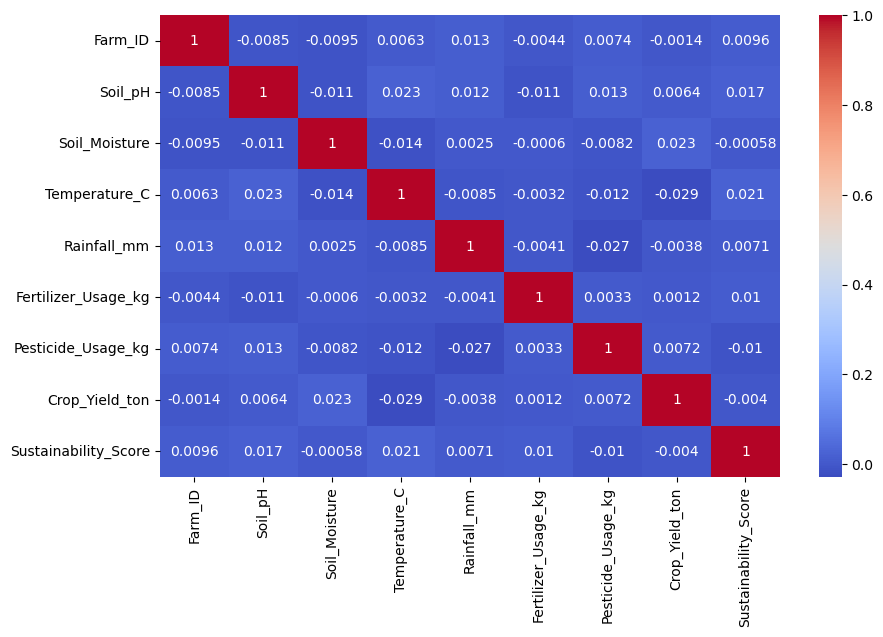

In [55]:


# Only use numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [37]:
#checking for dublicates.
df.drop_duplicates()

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941
...,...,...,...,...,...,...,...,...,...,...
9995,9996,6.637573,15.723781,32.330501,267.024180,Rice,89.202027,13.514577,6.118399,8.578651
9996,9997,6.251629,12.161680,23.324274,133.896098,Rice,92.675510,3.257280,9.791433,96.561580
9997,9998,7.038902,10.163089,23.400036,133.704986,Rice,104.183016,14.903259,3.623067,51.658196
9998,9999,5.647329,28.633415,31.122309,102.169135,Rice,58.636950,12.418353,6.605352,16.538088


Encoding of data, This is where i convert my categorical column(Crop_Type) to numerical column so it can fit into my model using one hot encoding


In [65]:
dummies = pd.get_dummies(data = df, columns =["Crop_Type"], drop_first = True)
dummies


,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Wheat
0,1,7.073643,49.145359,26.668157,227.890912,131.692844,2.958215,1.576920,51.913649,False,False,True
1,2,6.236931,21.496115,29.325342,244.017493,136.370492,19.204770,3.824686,47.159077,False,True,False
2,3,5.922335,19.469042,17.666414,141.110521,99.725210,11.041066,1.133198,50.148418,False,False,False
3,4,6.845120,27.974234,17.188722,156.785663,194.832396,8.806271,8.870540,89.764557,False,False,True
4,5,6.934171,33.637679,23.603899,77.859362,57.271267,3.747553,8.779317,51.033941,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,6.637573,15.723781,32.330501,267.024180,89.202027,13.514577,6.118399,8.578651,True,False,False
9996,9997,6.251629,12.161680,23.324274,133.896098,92.675510,3.257280,9.791433,96.561580,True,False,False
9997,9998,7.038902,10.163089,23.400036,133.704986,104.183016,14.903259,3.623067,51.658196,True,False,False
9998,9999,5.647329,28.633415,31.122309,102.169135,58.636950,12.418353,6.605352,16.538088,True,False,False


In [69]:
cols = ['Crop_Type_Wheat', 'Crop_Type_Rice', 'Crop_Type_Soybean']  
dummies[cols] = dummies[cols].astype(int)


In [71]:
dummies

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score,Crop_Type_Rice,Crop_Type_Soybean,Crop_Type_Wheat
0,1,7.073643,49.145359,26.668157,227.890912,131.692844,2.958215,1.576920,51.913649,0,0,1
1,2,6.236931,21.496115,29.325342,244.017493,136.370492,19.204770,3.824686,47.159077,0,1,0
2,3,5.922335,19.469042,17.666414,141.110521,99.725210,11.041066,1.133198,50.148418,0,0,0
3,4,6.845120,27.974234,17.188722,156.785663,194.832396,8.806271,8.870540,89.764557,0,0,1
4,5,6.934171,33.637679,23.603899,77.859362,57.271267,3.747553,8.779317,51.033941,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,6.637573,15.723781,32.330501,267.024180,89.202027,13.514577,6.118399,8.578651,1,0,0
9996,9997,6.251629,12.161680,23.324274,133.896098,92.675510,3.257280,9.791433,96.561580,1,0,0
9997,9998,7.038902,10.163089,23.400036,133.704986,104.183016,14.903259,3.623067,51.658196,1,0,0
9998,9999,5.647329,28.633415,31.122309,102.169135,58.636950,12.418353,6.605352,16.538088,1,0,0
